In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
#Read in the dataset
UK_residents = pd.read_excel('../Datasets/Travelpac_cleaned_UK_final.xlsx', 'Labelled 2014-2017')

#See stats about the continuous variables
UK_residents[['weighted_visits', 'weighted_nights', 'weighted_spend']].describe()

,weighted_visits,weighted_nights,weighted_spend
count,45770.000000,4.577000e+04,4.577000e+04
mean,4341.906550,3.549589e+04,2.094206e+06
std,10390.409996,8.847639e+04,6.059189e+06
min,150.220000,0.000000e+00,0.000000e+00
25%,966.260000,4.193937e+03,2.321166e+05
50%,1758.040000,1.145001e+04,6.313106e+05
75%,3819.027250,3.048415e+04,1.695876e+06
max,227298.584000,1.928208e+06,3.191209e+08


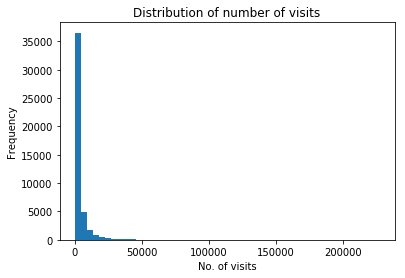

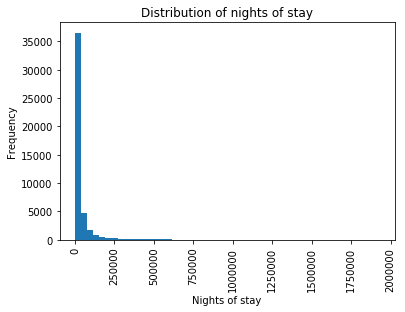

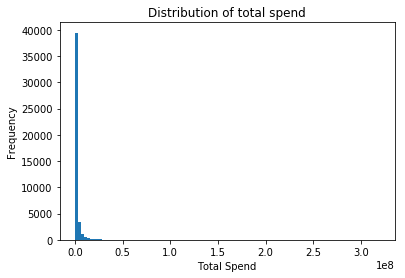

In [17]:
#Separate the continuous variables
wv = UK_residents['weighted_visits']
wn = UK_residents['weighted_nights']
ws = UK_residents['weighted_spend']

#Plot histograms
plt.hist(wv,bins=50)
plt.title("Distribution of number of visits")
plt.xlabel("No. of visits")
plt.ylabel("Frequency")
plt.show()

plt.hist(wn,bins=50)
plt.title("Distribution of nights of stay")
plt.xlabel("Nights of stay")
plt.xticks(rotation='vertical')
plt.ylabel("Frequency")
plt.show()

plt.hist(ws,bins=100)
plt.title("Distribution of total spend")
plt.xlabel("Total Spend")
plt.ylabel("Frequency")
plt.show()

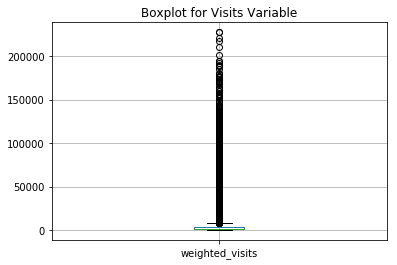

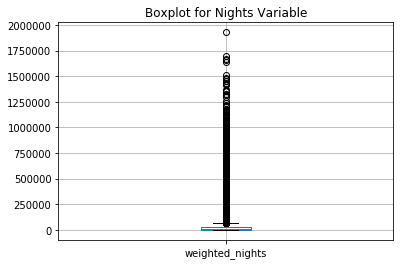

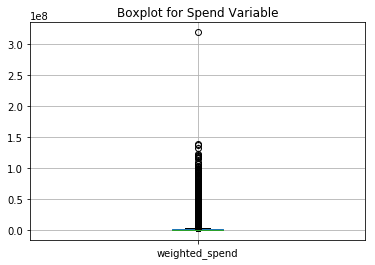

In [18]:
UK_residents.boxplot(column=['weighted_visits'], return_type='axes')
plt.title('Boxplot for Visits Variable')
plt.show()

UK_residents.boxplot(column=['weighted_nights'], return_type='axes')
plt.title('Boxplot for Nights Variable')
plt.show()

UK_residents.boxplot(column=['weighted_spend'], return_type='axes')
plt.title('Boxplot for Spend Variable')
plt.show()

In [19]:
filt_outlier = UK_residents[['weighted_visits', 'weighted_nights', 'weighted_spend']]

low = .05
high = .95
quant_outlier = filt_outlier.quantile([low, high])

print(quant_outlier)

      weighted_visits  weighted_nights  weighted_spend
0.05        480.71800        420.83785    3.638939e+04
0.95      14896.25235     137069.11070    7.814437e+06


In [20]:
#remove all rows that are considered outlier (underneath 5th and 95th percentile) from all columns
filt_outlier = filt_outlier.apply(lambda x: x[(x>quant_outlier.loc[low,x.name]) & 
                                    (x < quant_outlier.loc[high,x.name])], axis=0)

In [21]:
#Now we have removed all rows underneath the 5th and the 95th percentile
filt_outlier.describe()

,weighted_visits,weighted_nights,weighted_spend
count,41187.000000,41192.000000,4.119200e+04
mean,2816.782015,21415.596448,1.198028e+06
std,2748.176901,25637.524877,1.446882e+06
min,481.850000,424.607000,3.640100e+04
25%,1020.505000,4672.692000,2.605496e+05
50%,1758.327000,11450.015000,6.313106e+05
75%,3473.659500,27345.869750,1.514758e+06
max,14894.505000,137049.600000,7.812774e+06


In [22]:
#Select the columns to join
cols_to_use = UK_residents.columns.difference(filt_outlier.columns)
#Join the continuous variables with rest of data
filt_outliers = pd.concat([UK_residents[cols_to_use], filt_outlier], axis=1, join='outer') 

#filt_outliers.head()

In [23]:
#drop any rows with removed outliers
filt_outliers = filt_outliers.dropna(axis=0, how='any')

In [24]:

filt_outliers.reset_index(drop=True, inplace = True)

writer = pd.ExcelWriter('cleaned_UK_outliers_removed.xlsx')
filt_outliers.to_excel(writer,'Sheet1', index=True)

writer.save()

In [25]:
filt_outliers[['weighted_visits', 'weighted_nights', 'weighted_spend']].describe()

,weighted_visits,weighted_nights,weighted_spend
count,36274.000000,36274.000000,3.627400e+04
mean,2759.017223,20744.033684,1.175505e+06
std,2619.238056,23440.002144,1.327524e+06
min,481.850000,482.265000,3.640100e+04
25%,1038.528500,5227.464000,2.978090e+05
50%,1779.733000,11990.882500,6.804879e+05
75%,3434.064250,26782.906250,1.517547e+06
max,14894.505000,137049.600000,7.812774e+06


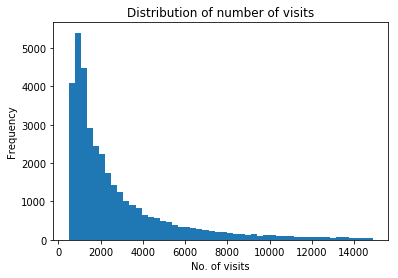

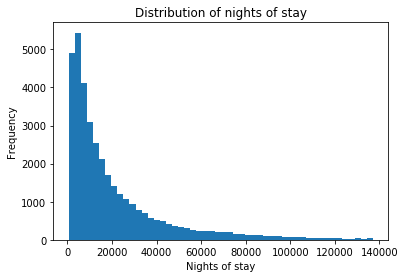

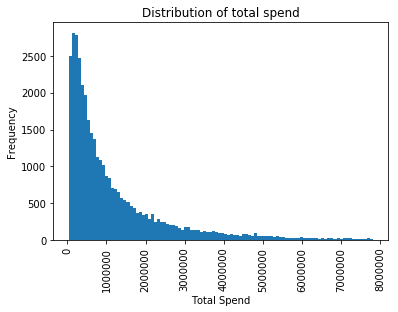

In [26]:
#Store only the 'weighted_visits' column
#not sure we need this as the tables above show this quite clearly already
wv = filt_outliers['weighted_visits']
wn = filt_outliers['weighted_nights']
ws = filt_outliers['weighted_spend']

plt.hist(wv,bins=50)
plt.title("Distribution of number of visits")
plt.xlabel("No. of visits")
plt.ylabel("Frequency")
plt.show()

plt.hist(wn,bins=50)
plt.title("Distribution of nights of stay")
plt.xlabel("Nights of stay")
plt.ylabel("Frequency")
plt.show()

plt.hist(ws,bins=100)
plt.title("Distribution of total spend")
plt.xlabel("Total Spend")
plt.ylabel("Frequency")
plt.xticks(rotation='vertical')
plt.show()



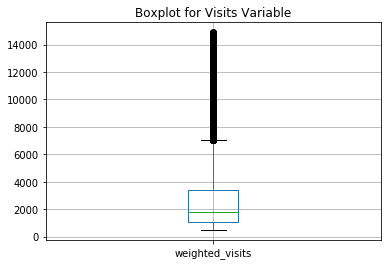

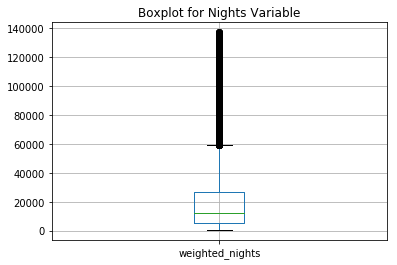

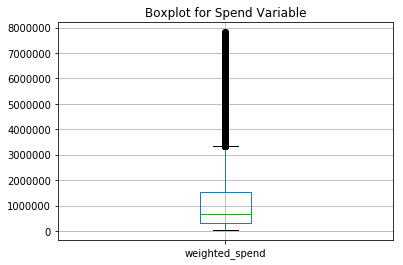

In [27]:
filt_outliers.boxplot(column=['weighted_visits'], return_type='axes')
plt.title('Boxplot for Visits Variable')
plt.show()

filt_outliers.boxplot(column=['weighted_nights'], return_type='axes')
plt.title('Boxplot for Nights Variable')
plt.show()

filt_outliers.boxplot(column=['weighted_spend'], return_type='axes')
plt.title('Boxplot for Spend Variable')
plt.show()

In [28]:
filt_outliers.shape

(36274, 13)